# Step5: Downstream Analysis

## Look at main Outputs

In [1]:
import os
import sys
import subprocess
import pycisTopic
pycisTopic.__version__
import subprocess
from pycisTopic.cistopic_class import *
from pycisTopic.utils import *
from pycisTopic.lda_models import * 
import anndata as ad
import scanpy as sc

2024-11-18 14:42:22,355	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
# Determine the folder in which the code is executed
WORKING_DIR = os.getcwd()
sys.path.append(os.path.abspath( WORKING_DIR))

# Run the params codes
%run -i ../../globalParams.py #GlobalParams
%run -i ../../sampleParams.py #sampleParams
%run -i ./analysisParams.py #AnalysisParams

In [3]:
import mudata
scplus_mdata = mudata.read(os.path.join(PATH_TO_THE_04d_OUPUT_FOLDER , "outs/scplusmdata.h5mu"))

/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  w

In [4]:
#Have a look at the direct_region_based_AUC content
scplus_mdata["direct_gene_based_AUC"].X

array([[0.09289617, 0.11930055, 0.12627412, ..., 0.19320843, 0.31348634,
        0.01628936],
       [0.22218579, 0.15003279, 0.22276124, ..., 0.06863778, 0.35663388,
        0.        ],
       [0.        , 0.38850273, 0.37390432, ..., 0.09419724, 0.46968306,
        0.1408535 ],
       ...,
       [0.03054645, 0.19186885, 0.06564068, ..., 0.06159251, 0.24972678,
        0.        ],
       [0.2589071 , 0.15359563, 0.05636222, ..., 0.07533828, 0.38459016,
        0.        ],
       [0.        , 0.1500765 , 0.09653173, ..., 0.09262946, 0.1660765 ,
        0.04821754]])

In [5]:
scplus_mdata

MuData object with n_obs × n_vars = 28815 × 310359
  uns:	'direct_e_regulon_metadata', 'extended_e_regulon_metadata'
  6 modalities
    scRNA_counts:	28815 x 36601
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'cell_type', 'sex', 'smoker', 'sample', 'nCount_peaks', 'nFeature_peaks', 'fragments', 'FRiP', 'blacklist_fraction', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'nucleosome_group', 'high.tss', 'percent.rb', 'percent.mt', 'percent.HSP', 'S.Score', 'G2M.Score', 'Phase', 'pct_chrY', 'nCount_SCT', 'nFeature_SCT', 'integrated.weight', 'peaks.weight', 'seurat_clusters', 'NK_sig_UCell', 'NK1_sig_UCell', 'NK2_sig_UCell', 'NKTvsNK_UCell', 'NKvsNKT_UCell', 'CD8_UCell', 'CD4_Treg_UCell', 'Monocytes_UCell', 'Bcells_Plasma_UCell', 'CD39_NK_UCell', 'Proliferating_UCell', 'T_noCD3E_UCell', 'T_TCRgenes_UCell', 'NK1_UCell', 'NK2_UCell', 'ILCvsNK_UCell', 'NKvsILC_UCell', 'ILC1_UCell', 'ILC2_UCell', 'ILC3_UCell', 'trNK_Mar_UCell', 'adaptive_HCMV_Rueckert_UCell', 'nCount_integrated', 'nFeature_integrated', 'Major_Annotation', 'Minor_Annotation', 'nCount_GeneActivity', 'nFeature_GeneActivity', 'ENTPD1_cl', 'TR', 'ITGAE_ITGA1', 'KIT_AFF3', 'stage', 'histo', 'detailed_stage', 'Donor_histo', 'Donor_stage', 'RNA_snn_res.0', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'Fine_Clustering_RNA', 'Coarse_Clustering_RNA', 'Fine_Annotation_RNA', 'Course_Annotation_RNA', 'Coarse_Annotation_RNA', 'peaks_snn_res.0', 'peaks_snn_res.0.1', 'peaks_snn_res.0.2', 'peaks_snn_res.0.3', 'peaks_snn_res.0.4', 'peaks_snn_res.0.5', 'peaks_snn_res.0.6', 'peaks_snn_res.0.7', 'peaks_snn_res.0.8', 'peaks_snn_res.0.9', 'peaks_snn_res.1', 'RNA.weight', 'wsnn_res.0', 'wsnn_res.0.1', 'wsnn_res.0.2', 'wsnn_res.0.3', 'wsnn_res.0.4', 'wsnn_res.0.5', 'wsnn_res.0.6', 'wsnn_res.0.7', 'wsnn_res.0.8', 'wsnn_res.0.9', 'wsnn_res.1', 'wsnn_res.0.2_1', 'wsnn_res.0.4_1', 'Fine_Annotation_WNN', 'peaks_snn_res.0.3_1', 'Annotation_Peaks_RNA', 'Annotation_Peaks_GA', 'Coarse_Annotation_WNN', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
      var:	'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_pca', 'X_umap'
    scATAC_counts:	28815 x 273300
      obs:	'pdf_values_for_tss_enrichment', 'barcode_rank', 'total_fragments_count', 'cisTopic_nr_frag', 'duplication_count', 'log10_total_fragments_in_peaks_count', 'pdf_values_for_fraction_of_fragments_in_peaks', 'log10_unique_fragments_count', 'cisTopic_log_nr_acc', 'pdf_values_for_duplication_ratio', 'tss_enrichment', 'unique_fragments_count', 'fraction_of_fragments_in_peaks', 'total_fragments_in_peaks_count', 'log10_total_fragments_count', 'log10_unique_fragments_in_peaks_count', 'cisTopic_nr_acc', 'duplication_ratio', 'unique_fragments_in_peaks_count', 'cisTopic_log_nr_frag', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'cell_type', 'sex', 'smoker', 'sample', 'nCount_peaks', 'nFeature_peaks', 'fragments', 'FRiP', 'blacklist_fraction', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'nucleosome_group', 'high.tss', 'percent.rb', 'percent.mt', 'percent.HSP', 'S.Score', 'G2M.Score', 'Phase', 'pct_chrY', 'nCount_SCT', 'nFeature_SCT', 'integrated.weight', 'peaks.weight', 'seurat_clusters', 'NK_sig_UCell', 'NK1_sig_UCell', 'NK2_sig_UCell', 'NKTvsNK_UCell', 'NKvsNKT_UCell', 'CD8_UCell', 'CD4_Treg_UCell', 'Monocytes_UCell', 'Bcells_Plasma_UCell', 'CD39_NK_UCell', 'Proliferating_UCell', 'T_noCD3E_UCell', 'T_TCRgenes_UCell', 'NK1_UCell', 'NK2_UCell', 'ILCvsNK_UCell', 'NKvsILC_UCell', 'ILC1_UCell', 'ILC2_UCell', 'ILC3_UCell', 'trNK_Mar_UCell', 'adaptive_HCMV_Rueckert_UCell', 'nCount_integrated', 'nFeature_integrated', 'Major_Annotation', 'Minor_Annotation', 'nCount_GeneActivity'

In [6]:
#Direct e_regulon
scplus_mdata.uns["direct_e_regulon_metadata"]

Region     Gene  importance_R2G   rho_R2G  \
0       chr3:183428522-183429022   MCF2L2        0.090444  0.154070   
1       chr7:107044388-107044888  PRKAR2B        0.115697  0.141868   
2        chr21:26170610-26171110      APP        0.116191  0.201390   
3       chr2:161237000-161237500     TANK        0.066403  0.205359   
4         chr7:76357505-76358005    HSPB1        0.074442  0.353226   
...                          ...      ...             ...       ...   
12720    chr16:31377230-31377730    ITGAM        0.016815 -0.063860   
12721    chr11:64850998-64851498  RASGRP2        0.008074 -0.118818   
12722      chr19:3140645-3141145     TLE5        0.012241 -0.075547   
12723   chr6:166413293-166413793   SFT2D1        0.018616 -0.116964   
12724  chr12:120123731-120124231      PXN        0.003862 -0.152155   

       importance_x_rho  importance_x_abs_rho    TF  is_extended  \
0              0.013935              0.013935   AHR        False   
1              0.016414              0.016414   AHR        False   
2              0.023400              0.023400   AHR        False   
3              0.013636              0.013636   AHR        False   
4              0.026295              0.026295   AHR        False   
...                 ...                   ...   ...          ...   
12720         -0.001074              0.001074  ZEB1        False   
12721         -0.000959              0.000959  ZEB1        False   
12722         -0.000925              0.000925  ZEB1        False   
12723         -0.002177              0.002177  ZEB1        False   
12724         -0.000588              0.000588  ZEB1        False   

         eRegulon_name    Gene_signature_name   Region_signature_name  \
0       AHR_direct_+/+   AHR_direct_+/+_(10g)    AHR_direct_+/+_(10r)   
1       AHR_direct_+/+   AHR_direct_+/+_(10g)    AHR_direct_+/+_(10r)   
2       AHR_direct_+/+   AHR_direct_+/+_(10g)    AHR_direct_+/+_(10r)   
3       AHR_direct_+/+   AHR_direct_+/+_(10g)    AHR_direct_+/+_(10r)   
4       AHR_direct_+/+   AHR_direct_+/+_(10g)    AHR_direct_+/+_(10r)   
...                ...                    ...                     ...   
12720  ZEB1_direct_-/-  ZEB1_direct_-/-_(84g)  ZEB1_direct_-/-_(115r)   
12721  ZEB1_direct_-/-  ZEB1_direct_-/-_(84g)  ZEB1_direct_-/-_(115r)   
12722  ZEB1_direct_-/-  ZEB1_direct_-/-_(84g)  ZEB1_direct_-/-_(115r)   
12723  ZEB1_direct_-/-  ZEB1_direct_-/-_(84g)  ZEB1_direct_-/-_(115r)   
12724  ZEB1_direct_-/-  ZEB1_direct_-/-_(84g)  ZEB1_direct_-/-_(115r)   

       importance_TF2G  regulation  rho_TF2G  triplet_rank  
0             1.247189           1  0.062635          6208  
1             1.330362           1  0.055310          2348  
2             2.272766           1  0.106099          2022  
3             1.895250           1  0.103359          5471  
4             1.284781           1  0.167901          5225  
...                ...         ...       ...           ...  
12720         4.547782          -1 -0.110129          6033  
12721         3.828317          -1 -0.086137          4276  
12722         3.182550          -1 -0.091005          9073  
12723         3.319826          -1 -0.077437          4997  
12724         2.235818          -1 -0.104514          1082  

[12725 rows x 15 columns]

In [7]:
#Extended e_regulon
scplus_mdata.uns["extended_e_regulon_metadata"]

Region    Gene  importance_R2G   rho_R2G  \
0       chrX:23781277-23781777    SAT1        0.042433  0.050805   
1      chr18:59902137-59902637  PMAIP1        0.070914  0.155003   
2      chr19:11096080-11096580    LDLR        0.067961  0.122511   
3       chr5:43281778-43282278  HMGCS1        0.089798  0.095187   
4     chr1:161605813-161606313   HSPA6        0.121469  0.441274   
...                        ...     ...             ...       ...   
7599    chr9:78150627-78151127   CEP78        0.015908 -0.054747   
7600  chr6:166435474-166435974  SFT2D1        0.004505 -0.060991   
7601  chr6:166411588-166412088  SFT2D1        0.074642 -0.142414   
7602   chr10:70656510-70657010    PRF1        0.006655 -0.214384   
7603  chr6:152309623-152310123   SYNE1        0.090155 -0.425170   

      importance_x_rho  importance_x_abs_rho     TF  is_extended  \
0             0.002156              0.002156   ATF3         True   
1             0.010992              0.010992   ATF3         True   
2             0.008326              0.008326   ATF3         True   
3             0.008548              0.008548   ATF3         True   
4             0.053601              0.053601   ATF3         True   
...                ...                   ...    ...          ...   
7599         -0.000871              0.000871  RUNX2         True   
7600         -0.000275              0.000275  RUNX2         True   
7601         -0.010630              0.010630  RUNX2         True   
7602         -0.001427              0.001427  RUNX2         True   
7603         -0.038331              0.038331  RUNX2         True   

           eRegulon_name       Gene_signature_name     Region_signature_name  \
0      ATF3_extended_+/+   ATF3_extended_+/+_(45g)   ATF3_extended_+/+_(80r)   
1      ATF3_extended_+/+   ATF3_extended_+/+_(45g)   ATF3_extended_+/+_(80r)   
2      ATF3_extended_+/+   ATF3_extended_+/+_(45g)   ATF3_extended_+/+_(80r)   
3      ATF3_extended_+/+   ATF3_extended_+/+_(45g)   ATF3_extended_+/+_(80r)   
4      ATF3_extended_+/+   ATF3_extended_+/+_(45g)   ATF3_extended_+/+_(80r)   
...                  ...                       ...                       ...   
7599  RUNX2_extended_-/-  RUNX2_extended_-/-_(38g)  RUNX2_extended_-/-_(67r)   
7600  RUNX2_extended_-/-  RUNX2_extended_-/-_(38g)  RUNX2_extended_-/-_(67r)   
7601  RUNX2_extended_-/-  RUNX2_extended_-/-_(38g)  RUNX2_extended_-/-_(67r)   
7602  RUNX2_extended_-/-  RUNX2_extended_-/-_(38g)  RUNX2_extended_-/-_(67r)   
7603  RUNX2_extended_-/-  RUNX2_extended_-/-_(38g)  RUNX2_extended_-/-_(67r)   

      importance_TF2G  regulation  rho_TF2G  triplet_rank  
0            2.618490           1  0.094224          4875  
1            4.799478           1  0.123625           335  
2            3.355850           1  0.088594          2445  
3            3.383671           1  0.097584           225  
4            2.552121           1  0.222121          1762  
...               ...         ...       ...           ...  
7599         0.673832          -1 -0.079252          6718  
7600         1.792737          -1 -0.063253          6284  
7601         1.792737          -1 -0.063253          2663  
7602         0.730771          -1 -0.148135          7102  
7603         1.485385          -1 -0.147617          1220  

[7604 rows x 15 columns]

## Downstream Analysis

### eRegulon dimensionality reduction

In [8]:
#Use the eRegulon enrichment scores to perform dimensionality reductions
eRegulon_gene_AUC = ad.concat(
    [scplus_mdata["direct_gene_based_AUC"], scplus_mdata["extended_gene_based_AUC"], scplus_mdata["direct_region_based_AUC"], scplus_mdata["extended_region_based_AUC"]],
    axis = 1,
)


In [9]:
eRegulon_gene_AUC

AnnData object with n_obs × n_vars = 28815 × 458

In [10]:
eRegulon_gene_AUC.obs = scplus_mdata.obs.loc[eRegulon_gene_AUC.obs_names]

In [11]:
sc.pp.neighbors(eRegulon_gene_AUC, use_rep = "X")

In [12]:
sc.tl.umap(eRegulon_gene_AUC)

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


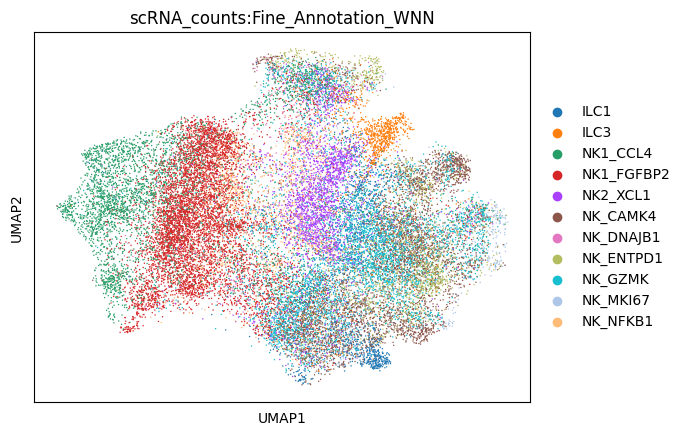

In [13]:
sc.pl.umap(eRegulon_gene_AUC, color =  "scRNA_counts:"+ CELL_TYPE_COLNAME)

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


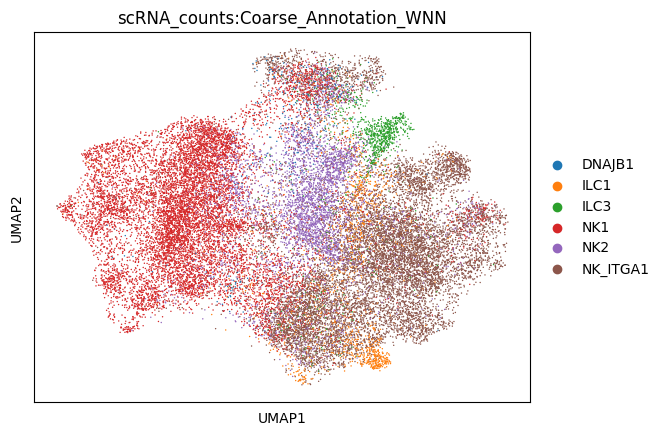

In [14]:
sc.pl.umap(eRegulon_gene_AUC, color =  "scRNA_counts:"+ CELL_TYPE_COLNAME2)

### eRegulon specificity score

In [15]:
from scenicplus.RSS import (regulon_specificity_scores, plot_rss)

In [16]:
rss = regulon_specificity_scores(
    scplus_mudata = scplus_mdata,
    variable = "scRNA_counts:"+ CELL_TYPE_COLNAME,
    modalities = ["direct_gene_based_AUC", "extended_gene_based_AUC"]
)

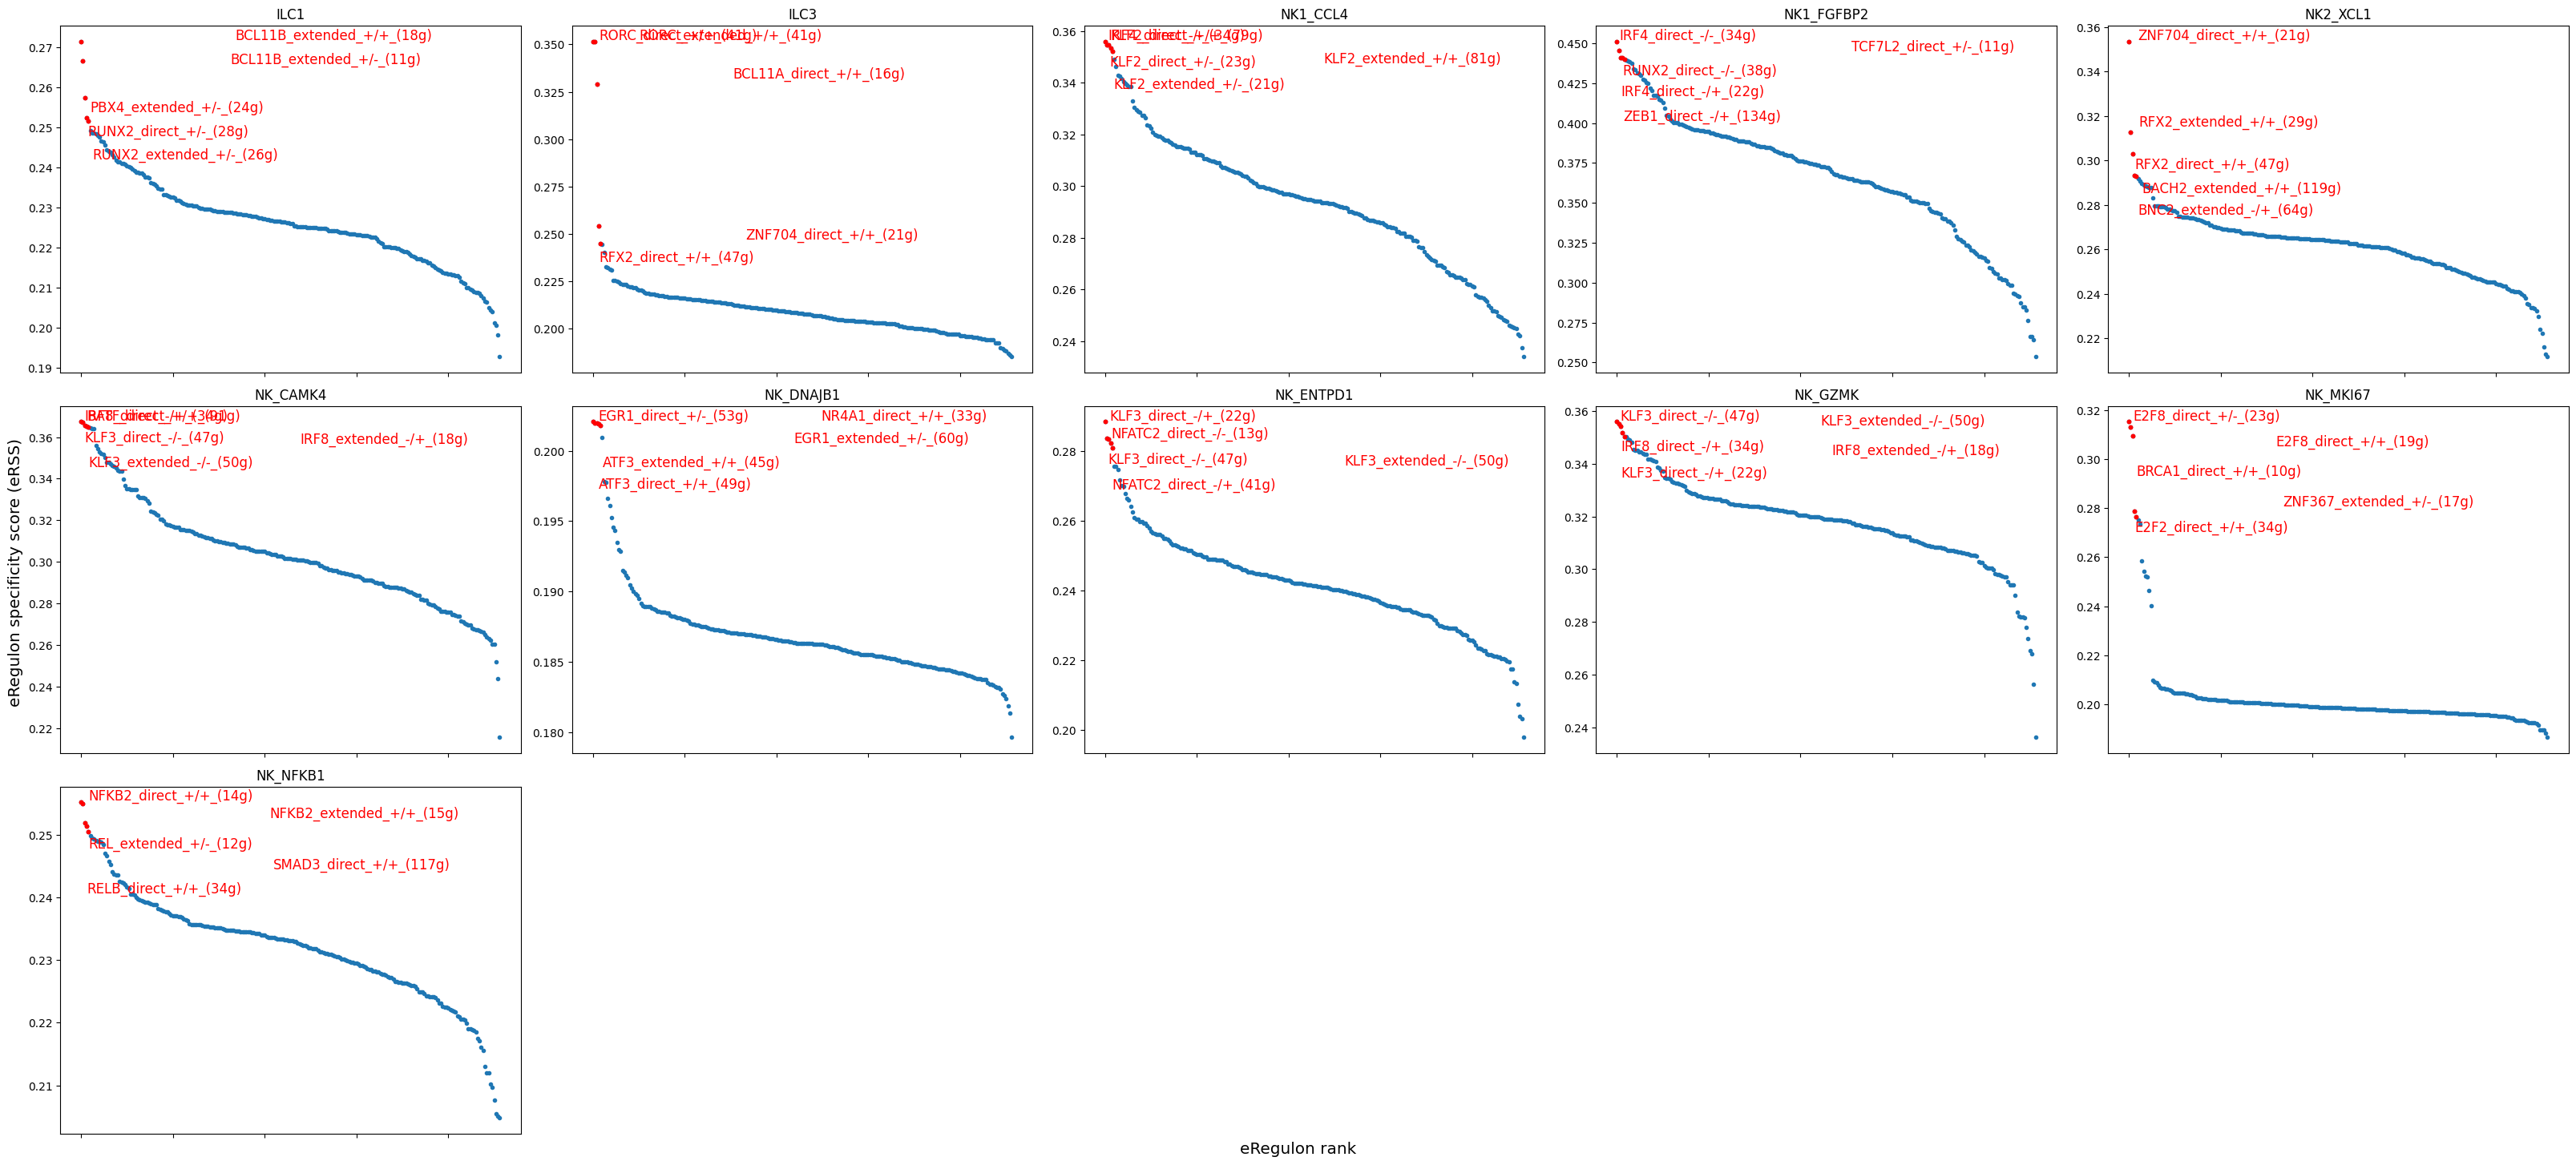

In [17]:
plot_rss(
    data_matrix = rss,
    top_n = 5,
    num_columns = 5
)

### eRegulon specificity score

/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


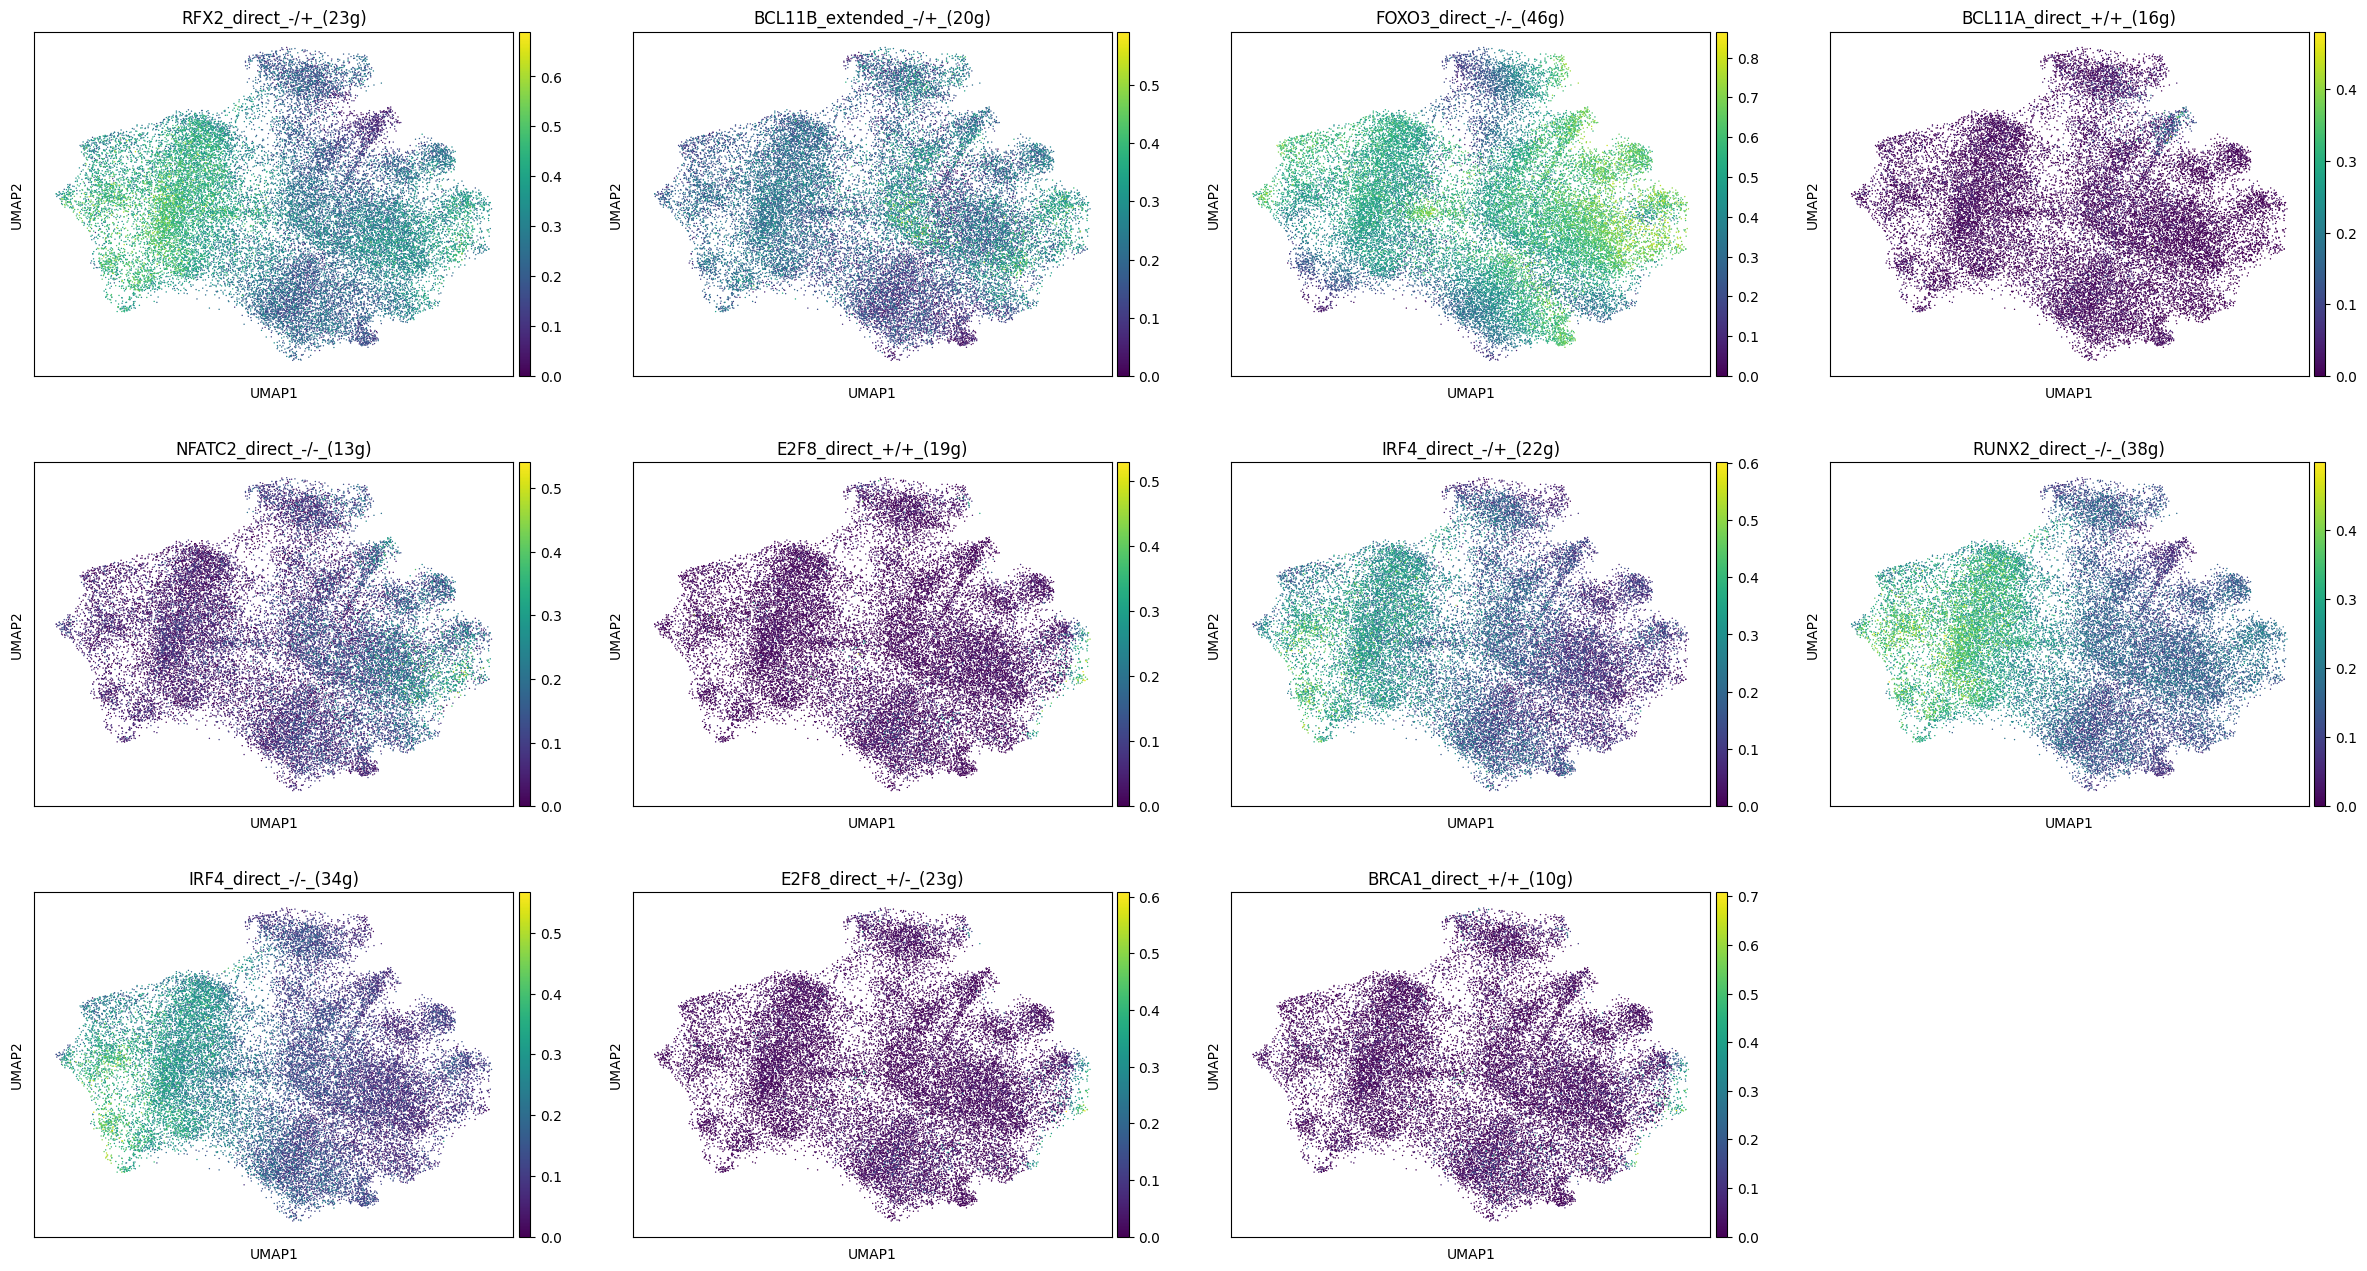

In [18]:
sc.pl.umap(eRegulon_gene_AUC, color = list(set([x for xs in [rss.loc[ct].sort_values()[0:2].index for ct in rss.index] for x in xs ])))

## Heatmap dotplot

In [19]:
from scenicplus.plotting.dotplot import heatmap_dotplot

In [20]:
help(heatmap_dotplot)

Help on function heatmap_dotplot in module scenicplus.plotting.dotplot:

heatmap_dotplot(scplus_mudata: Union[mudata._core.mudata.MuData, scenicplus.scenicplus_mudata.ScenicPlusMuData], size_modality: str, color_modality: str, group_variable: str, eRegulon_metadata_key: str, size_feature_key: str, color_feature_key: str, feature_name_key: str, sort_data_by: str, subset_feature_names: Optional[List[str]] = None, scale_size_matrix: bool = True, scale_color_matrix: bool = True, group_variable_order: Optional[List[str]] = None, save: Optional[str] = None, figsize: Tuple[float, float] = (5, 8), split_repressor_activator: bool = True, orientation: str = 'vertical')



In [21]:
scplus_mdata

MuData object with n_obs × n_vars = 28815 × 310359
  uns:	'direct_e_regulon_metadata', 'extended_e_regulon_metadata'
  6 modalities
    scRNA_counts:	28815 x 36601
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'cell_type', 'sex', 'smoker', 'sample', 'nCount_peaks', 'nFeature_peaks', 'fragments', 'FRiP', 'blacklist_fraction', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'nucleosome_group', 'high.tss', 'percent.rb', 'percent.mt', 'percent.HSP', 'S.Score', 'G2M.Score', 'Phase', 'pct_chrY', 'nCount_SCT', 'nFeature_SCT', 'integrated.weight', 'peaks.weight', 'seurat_clusters', 'NK_sig_UCell', 'NK1_sig_UCell', 'NK2_sig_UCell', 'NKTvsNK_UCell', 'NKvsNKT_UCell', 'CD8_UCell', 'CD4_Treg_UCell', 'Monocytes_UCell', 'Bcells_Plasma_UCell', 'CD39_NK_UCell', 'Proliferating_UCell', 'T_noCD3E_UCell', 'T_TCRgenes_UCell', 'NK1_UCell', 'NK2_UCell', 'ILCvsNK_UCell', 'NKvsILC_UCell', 'ILC1_UCell', 'ILC2_UCell', 'ILC3_UCell', 'trNK_Mar_UCell', 'adaptive_HCMV_Rueckert_UCell', 'nCount_integrated', 'nFeature_integrated', 'Major_Annotation', 'Minor_Annotation', 'nCount_GeneActivity', 'nFeature_GeneActivity', 'ENTPD1_cl', 'TR', 'ITGAE_ITGA1', 'KIT_AFF3', 'stage', 'histo', 'detailed_stage', 'Donor_histo', 'Donor_stage', 'RNA_snn_res.0', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'Fine_Clustering_RNA', 'Coarse_Clustering_RNA', 'Fine_Annotation_RNA', 'Course_Annotation_RNA', 'Coarse_Annotation_RNA', 'peaks_snn_res.0', 'peaks_snn_res.0.1', 'peaks_snn_res.0.2', 'peaks_snn_res.0.3', 'peaks_snn_res.0.4', 'peaks_snn_res.0.5', 'peaks_snn_res.0.6', 'peaks_snn_res.0.7', 'peaks_snn_res.0.8', 'peaks_snn_res.0.9', 'peaks_snn_res.1', 'RNA.weight', 'wsnn_res.0', 'wsnn_res.0.1', 'wsnn_res.0.2', 'wsnn_res.0.3', 'wsnn_res.0.4', 'wsnn_res.0.5', 'wsnn_res.0.6', 'wsnn_res.0.7', 'wsnn_res.0.8', 'wsnn_res.0.9', 'wsnn_res.1', 'wsnn_res.0.2_1', 'wsnn_res.0.4_1', 'Fine_Annotation_WNN', 'peaks_snn_res.0.3_1', 'Annotation_Peaks_RNA', 'Annotation_Peaks_GA', 'Coarse_Annotation_WNN', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
      var:	'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_pca', 'X_umap'
    scATAC_counts:	28815 x 273300
      obs:	'pdf_values_for_tss_enrichment', 'barcode_rank', 'total_fragments_count', 'cisTopic_nr_frag', 'duplication_count', 'log10_total_fragments_in_peaks_count', 'pdf_values_for_fraction_of_fragments_in_peaks', 'log10_unique_fragments_count', 'cisTopic_log_nr_acc', 'pdf_values_for_duplication_ratio', 'tss_enrichment', 'unique_fragments_count', 'fraction_of_fragments_in_peaks', 'total_fragments_in_peaks_count', 'log10_total_fragments_count', 'log10_unique_fragments_in_peaks_count', 'cisTopic_nr_acc', 'duplication_ratio', 'unique_fragments_in_peaks_count', 'cisTopic_log_nr_frag', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'cell_type', 'sex', 'smoker', 'sample', 'nCount_peaks', 'nFeature_peaks', 'fragments', 'FRiP', 'blacklist_fraction', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'nucleosome_group', 'high.tss', 'percent.rb', 'percent.mt', 'percent.HSP', 'S.Score', 'G2M.Score', 'Phase', 'pct_chrY', 'nCount_SCT', 'nFeature_SCT', 'integrated.weight', 'peaks.weight', 'seurat_clusters', 'NK_sig_UCell', 'NK1_sig_UCell', 'NK2_sig_UCell', 'NKTvsNK_UCell', 'NKvsNKT_UCell', 'CD8_UCell', 'CD4_Treg_UCell', 'Monocytes_UCell', 'Bcells_Plasma_UCell', 'CD39_NK_UCell', 'Proliferating_UCell', 'T_noCD3E_UCell', 'T_TCRgenes_UCell', 'NK1_UCell', 'NK2_UCell', 'ILCvsNK_UCell', 'NKvsILC_UCell', 'ILC1_UCell', 'ILC2_UCell', 'ILC3_UCell', 'trNK_Mar_UCell', 'adaptive_HCMV_Rueckert_UCell', 'nCount_integrated', 'nFeature_integrated', 'Major_Annotation', 'Minor_Annotation', 'nCount_GeneActivity'

In [ ]:
##### Explore from here

In [39]:
eRegulon_names_list = list(set(scplus_mdata.uns['direct_e_regulon_metadata']['eRegulon_name']))

In [40]:
eRegulon_names_list_extended = list(set(scplus_mdata.uns['extended_e_regulon_metadata']['eRegulon_name']))

In [41]:
print(eRegulon_names_list)

['PRDM1_direct_+/-', 'NFE2L3_direct_+/+', 'BRCA1_direct_+/-', 'RFX3_direct_+/+', 'ATF3_direct_+/+', 'NR3C1_direct_-/+', 'ELK3_direct_+/+', 'SP3_direct_+/-', 'IRF1_direct_+/+', 'KLF6_direct_-/-', 'RORC_direct_+/+', 'NR3C1_direct_+/-', 'RUNX2_direct_+/-', 'FOSL2_direct_+/-', 'BNC2_direct_-/-', 'IRF8_direct_+/-', 'RFX2_direct_+/+', 'CHD1_direct_+/-', 'KLF12_direct_-/+', 'FOXO3_direct_-/-', 'AHR_direct_+/+', 'RUNX1_direct_+/-', 'IRF1_direct_+/-', 'JUN_direct_+/+', 'NR3C1_direct_+/+', 'SMAD3_direct_+/+', 'TFDP2_direct_-/+', 'STAT1_direct_+/+', 'ZEB1_direct_-/-', 'NFATC2_direct_+/+', 'CHD1_direct_-/-', 'BRCA1_direct_+/+', 'MAF_direct_+/+', 'JUND_direct_-/-', 'IKZF2_direct_+/-', 'BCL11A_direct_+/+', 'PRDM1_direct_+/+', 'NFKB2_direct_+/+', 'NFATC2_direct_+/-', 'ZEB1_direct_+/-', 'KLF3_direct_+/+', 'BNC2_direct_+/+', 'JUNB_direct_+/+', 'NR4A1_direct_+/+', 'SMARCC1_direct_+/-', 'BATF_direct_+/+', 'IRF4_direct_-/-', 'RORA_direct_+/+', 'RUNX3_direct_+/+', 'AHR_direct_+/-', 'KLF12_direct_-/-', 'E2F

In [42]:
print(eRegulon_names_list_extended)

['ETS1_extended_+/-', 'BNC2_extended_+/+', 'FOSL2_extended_+/-', 'KLF6_extended_-/-', 'CREM_extended_-/+', 'KLF6_extended_-/+', 'RUNX3_extended_+/+', 'FOS_extended_+/-', 'IRF1_extended_+/+', 'RUNX2_extended_+/-', 'EGR1_extended_+/-', 'BCL11B_extended_+/+', 'FOSB_extended_-/-', 'RUNX2_extended_+/+', 'ATF3_extended_-/-', 'RORC_extended_+/+', 'BNC2_extended_+/-', 'IRF8_extended_-/+', 'ETV6_extended_+/+', 'KLF13_extended_+/+', 'BACH2_extended_-/+', 'IRF8_extended_+/+', 'IRF4_extended_+/+', 'RUNX1_extended_-/+', 'RELB_extended_+/+', 'KLF9_extended_+/+', 'FOSB_extended_+/-', 'FOXO1_extended_+/-', 'BCL11B_extended_-/+', 'NFKB1_extended_-/-', 'ELF1_extended_+/-', 'SP3_extended_+/-', 'NFE2L2_extended_+/+', 'KLF12_extended_-/-', 'EGR1_extended_-/+', 'KLF2_extended_-/-', 'IRF8_extended_+/-', 'RUNX2_extended_-/+', 'ELF1_extended_+/+', 'RUNX1_extended_+/-', 'FOSL2_extended_+/+', 'JUNB_extended_+/-', 'BACH2_extended_+/+', 'NFKB2_extended_+/+', 'RFX2_extended_+/+', 'RFX3_extended_+/+', 'BCL11B_extend

In [43]:
print(list(eRegulon_gene_AUC.var_names))

['AHR_direct_+/+_(10g)', 'AHR_direct_+/-_(25g)', 'ATF3_direct_+/+_(49g)', 'ATF3_direct_+/-_(44g)', 'ATF3_direct_-/-_(30g)', 'BACH2_direct_+/+_(257g)', 'BACH2_direct_-/-_(104g)', 'BATF_direct_+/+_(91g)', 'BATF_direct_+/-_(15g)', 'BCL11A_direct_+/+_(16g)', 'BHLHE40_direct_+/-_(34g)', 'BNC2_direct_+/+_(72g)', 'BNC2_direct_+/-_(210g)', 'BNC2_direct_-/+_(133g)', 'BNC2_direct_-/-_(10g)', 'BPTF_direct_+/+_(11g)', 'BRCA1_direct_+/+_(10g)', 'BRCA1_direct_+/-_(12g)', 'CHD1_direct_+/-_(59g)', 'CHD1_direct_-/+_(33g)', 'CHD1_direct_-/-_(15g)', 'CREM_direct_+/-_(107g)', 'CREM_direct_-/+_(15g)', 'DRAP1_direct_+/-_(107g)', 'E2F2_direct_+/+_(34g)', 'E2F2_direct_+/-_(58g)', 'E2F7_direct_+/+_(55g)', 'E2F7_direct_+/-_(49g)', 'E2F8_direct_+/+_(19g)', 'E2F8_direct_+/-_(23g)', 'EGR1_direct_+/-_(53g)', 'EGR1_direct_-/+_(38g)', 'ELF1_direct_+/+_(28g)', 'ELF2_direct_+/+_(10g)', 'ELF2_direct_+/-_(11g)', 'ELK3_direct_+/+_(10g)', 'ETS1_direct_+/+_(45g)', 'ETS1_direct_+/-_(31g)', 'FLI1_direct_+/+_(14g)', 'FOSB_dire

In [44]:
print(len(eRegulon_names_list))

138


In [45]:
print(len(eRegulon_names_list_extended))

91


In [46]:
# Extract unique eRegulon names as a list
eRegulon_names_list = list(set(scplus_mdata.uns['direct_e_regulon_metadata']['eRegulon_name']))

# Apply conditional filtering
if DO_FILTER_REGULON:
    filtered_eRegulon_names = [name for name in eRegulon_names_list if name.endswith("+/+") or name.endswith("+/-")]
else:
    filtered_eRegulon_names = eRegulon_names_list


In [52]:
# Extract unique eRegulon names as a list
eRegulon_names_list = list(set(scplus_mdata.uns['direct_e_regulon_metadata']['eRegulon_name']))

# Define the filtering condition
DO_FILTER_REGULON = True  # Set this to True or False as needed

if DO_FILTER_REGULON:
    # Split the names by their common identifier (excluding the suffix) and collect pairs
    regulon_dict = {}
    for name in eRegulon_names_list:
        base_name = name.rsplit('_', 1)[0]  # Extract the base part of the name before the suffix
        regulon_dict.setdefault(base_name, []).append(name)

    # Keep only the most specific forms: +/+ for activator and -/+ for repressor
    filtered_eRegulon_names = []
    for base_name, variants in regulon_dict.items():
        activator_variants = [v for v in variants if v.endswith("+/+") or v.endswith("+/-")]
        repressor_variants = [v for v in variants if v.endswith("-/+") or v.endswith("-/-")]

        # Handle activators: keep only +/+ if both forms exist
        if any(v.endswith("+/+") for v in activator_variants):
            filtered_eRegulon_names.append(next(v for v in activator_variants if v.endswith("+/+")))
        else:
            filtered_eRegulon_names.extend(activator_variants)

        # Handle repressors: keep only -/+ if both forms exist
        if any(v.endswith("-/+") for v in repressor_variants):
            filtered_eRegulon_names.append(next(v for v in repressor_variants if v.endswith("-/+")))
        else:
            filtered_eRegulon_names.extend(repressor_variants)
else:
    filtered_eRegulon_names = eRegulon_names_list

# Print the filtered list
print("Filtered eRegulon names:", filtered_eRegulon_names)



Filtered eRegulon names: ['PRDM1_direct_+/+', 'NFE2L3_direct_+/+', 'BRCA1_direct_+/+', 'RFX3_direct_+/+', 'ATF3_direct_+/+', 'ATF3_direct_-/-', 'NR3C1_direct_+/+', 'NR3C1_direct_-/+', 'ELK3_direct_+/+', 'SP3_direct_+/-', 'IRF1_direct_+/+', 'KLF6_direct_-/+', 'RORC_direct_+/+', 'RUNX2_direct_+/+', 'RUNX2_direct_-/+', 'FOSL2_direct_+/+', 'BNC2_direct_+/+', 'BNC2_direct_-/+', 'IRF8_direct_+/+', 'IRF8_direct_-/+', 'RFX2_direct_+/+', 'RFX2_direct_-/+', 'CHD1_direct_+/-', 'CHD1_direct_-/+', 'KLF12_direct_-/+', 'FOXO3_direct_-/+', 'AHR_direct_+/+', 'RUNX1_direct_+/+', 'RUNX1_direct_-/+', 'JUN_direct_+/+', 'SMAD3_direct_+/+', 'TFDP2_direct_+/+', 'TFDP2_direct_-/+', 'STAT1_direct_+/+', 'ZEB1_direct_+/+', 'ZEB1_direct_-/+', 'NFATC2_direct_+/+', 'NFATC2_direct_-/+', 'MAF_direct_+/+', 'JUND_direct_+/-', 'JUND_direct_-/-', 'IKZF2_direct_+/-', 'BCL11A_direct_+/+', 'NFKB2_direct_+/+', 'KLF3_direct_+/+', 'KLF3_direct_-/+', 'JUNB_direct_+/+', 'NR4A1_direct_+/+', 'SMARCC1_direct_+/-', 'BATF_direct_+/+',

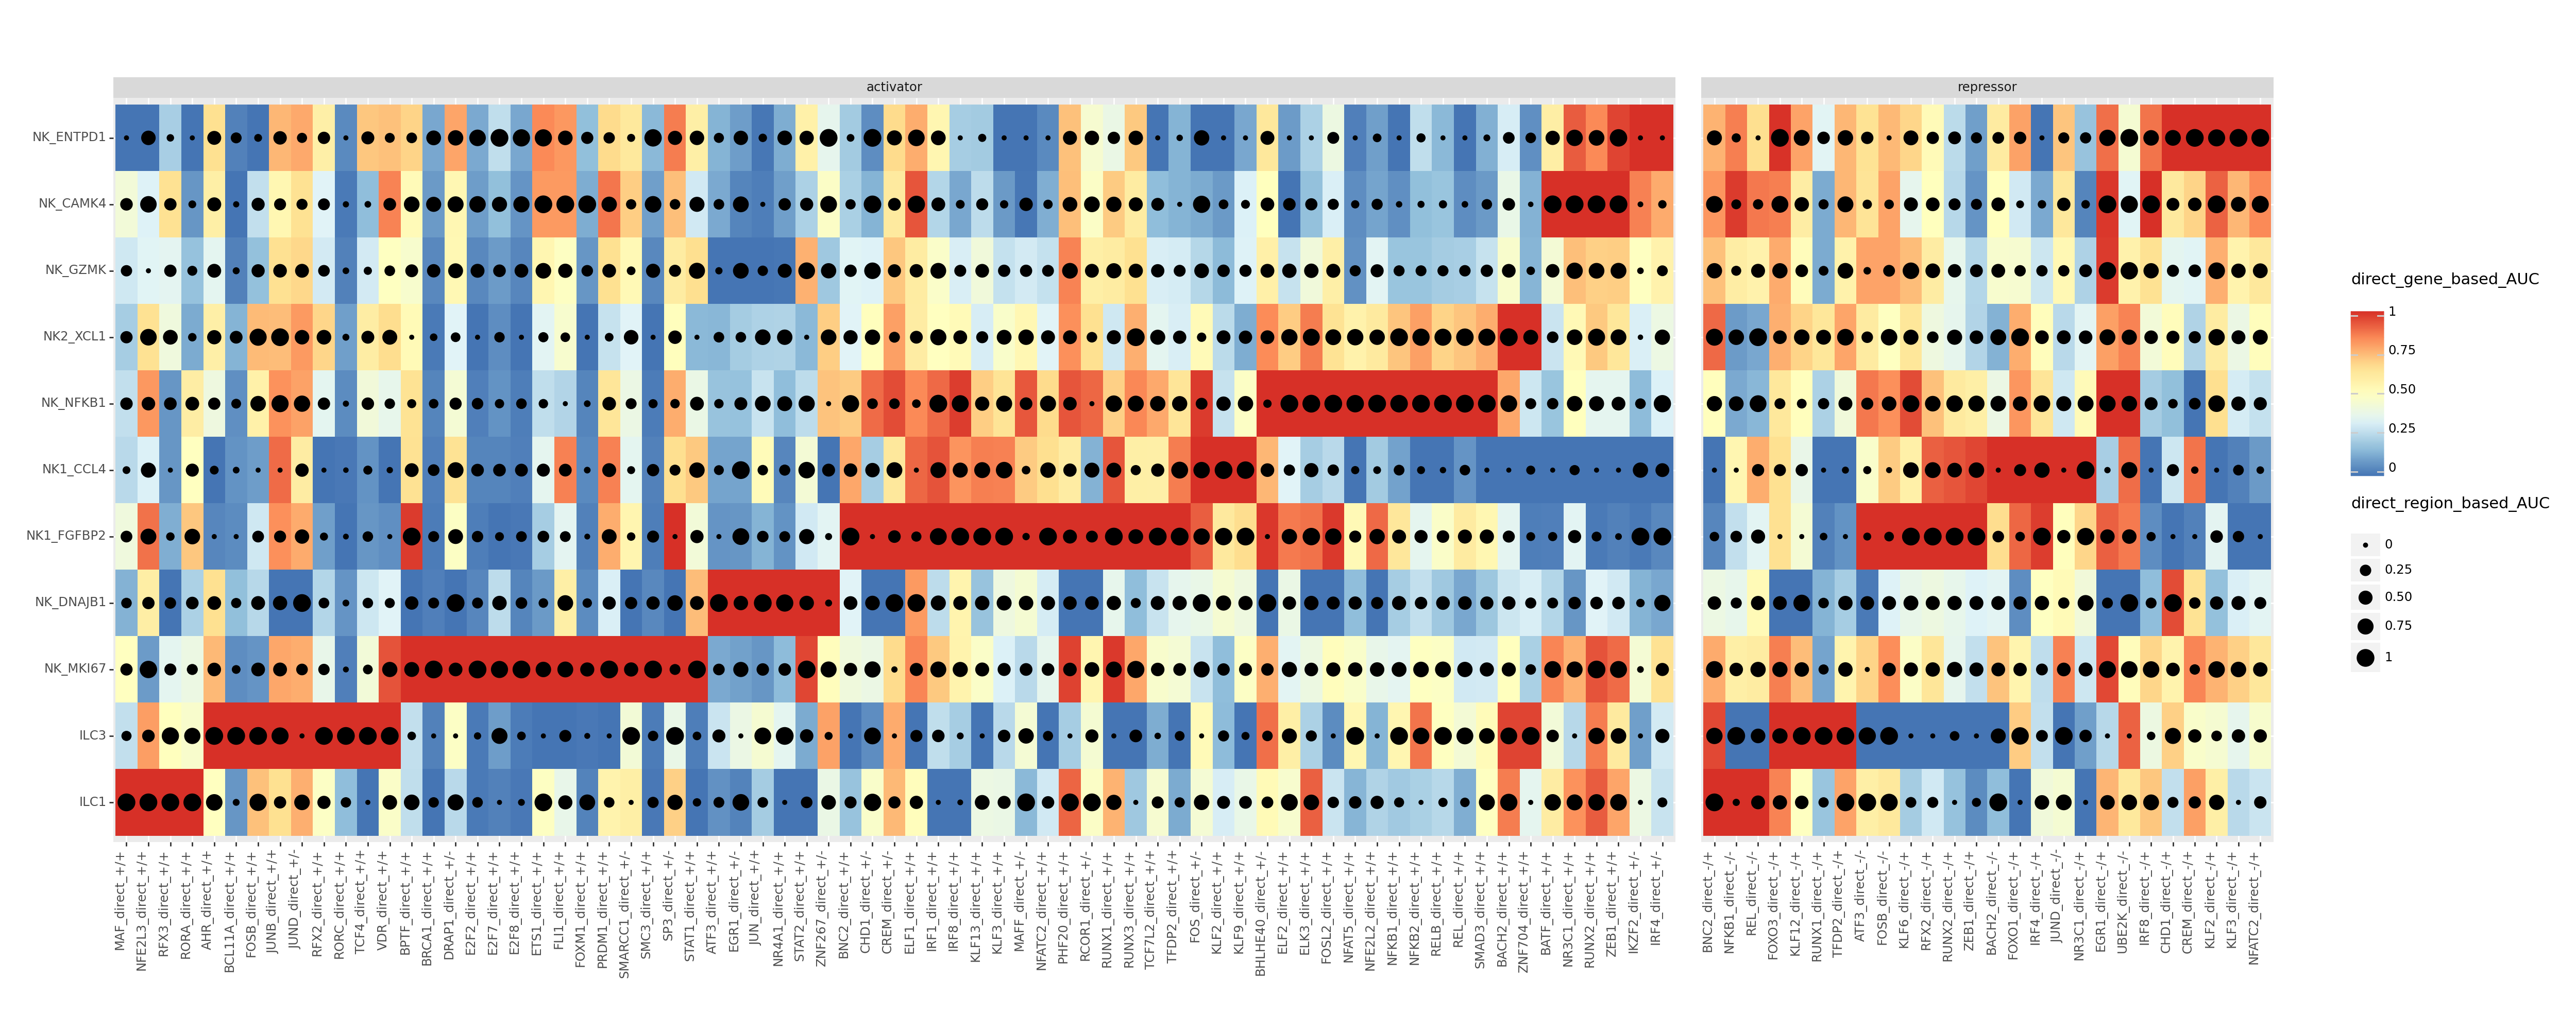

<Figure Size: (2500 x 1000)>

In [53]:
#Saving the heatmaps Gene selection
import matplotlib.pyplot as plt
heatmap_dotplot(
    scplus_mudata = scplus_mdata,
    color_modality = "direct_gene_based_AUC",
    size_modality = "direct_region_based_AUC",
    group_variable = "scRNA_counts:"+ CELL_TYPE_COLNAME,
    eRegulon_metadata_key = "direct_e_regulon_metadata",
    color_feature_key = "Gene_signature_name",
    size_feature_key = "Region_signature_name",
    feature_name_key = "eRegulon_name", #eRegulon_name
    sort_data_by = "direct_gene_based_AUC",
    orientation = "horizontal",
    split_repressor_activator = True,
    figsize = (25, 10),
    group_variable_order = GROUP_VARIABLE_ORDER,
    subset_feature_names = filtered_eRegulon_names
    #save = os.path.join( PATH_ANALYSIS_OUTPUT, "heatmap_dotplots/Heat_Map__DotPlot_Gene_Best_horizontal.pdf")
)


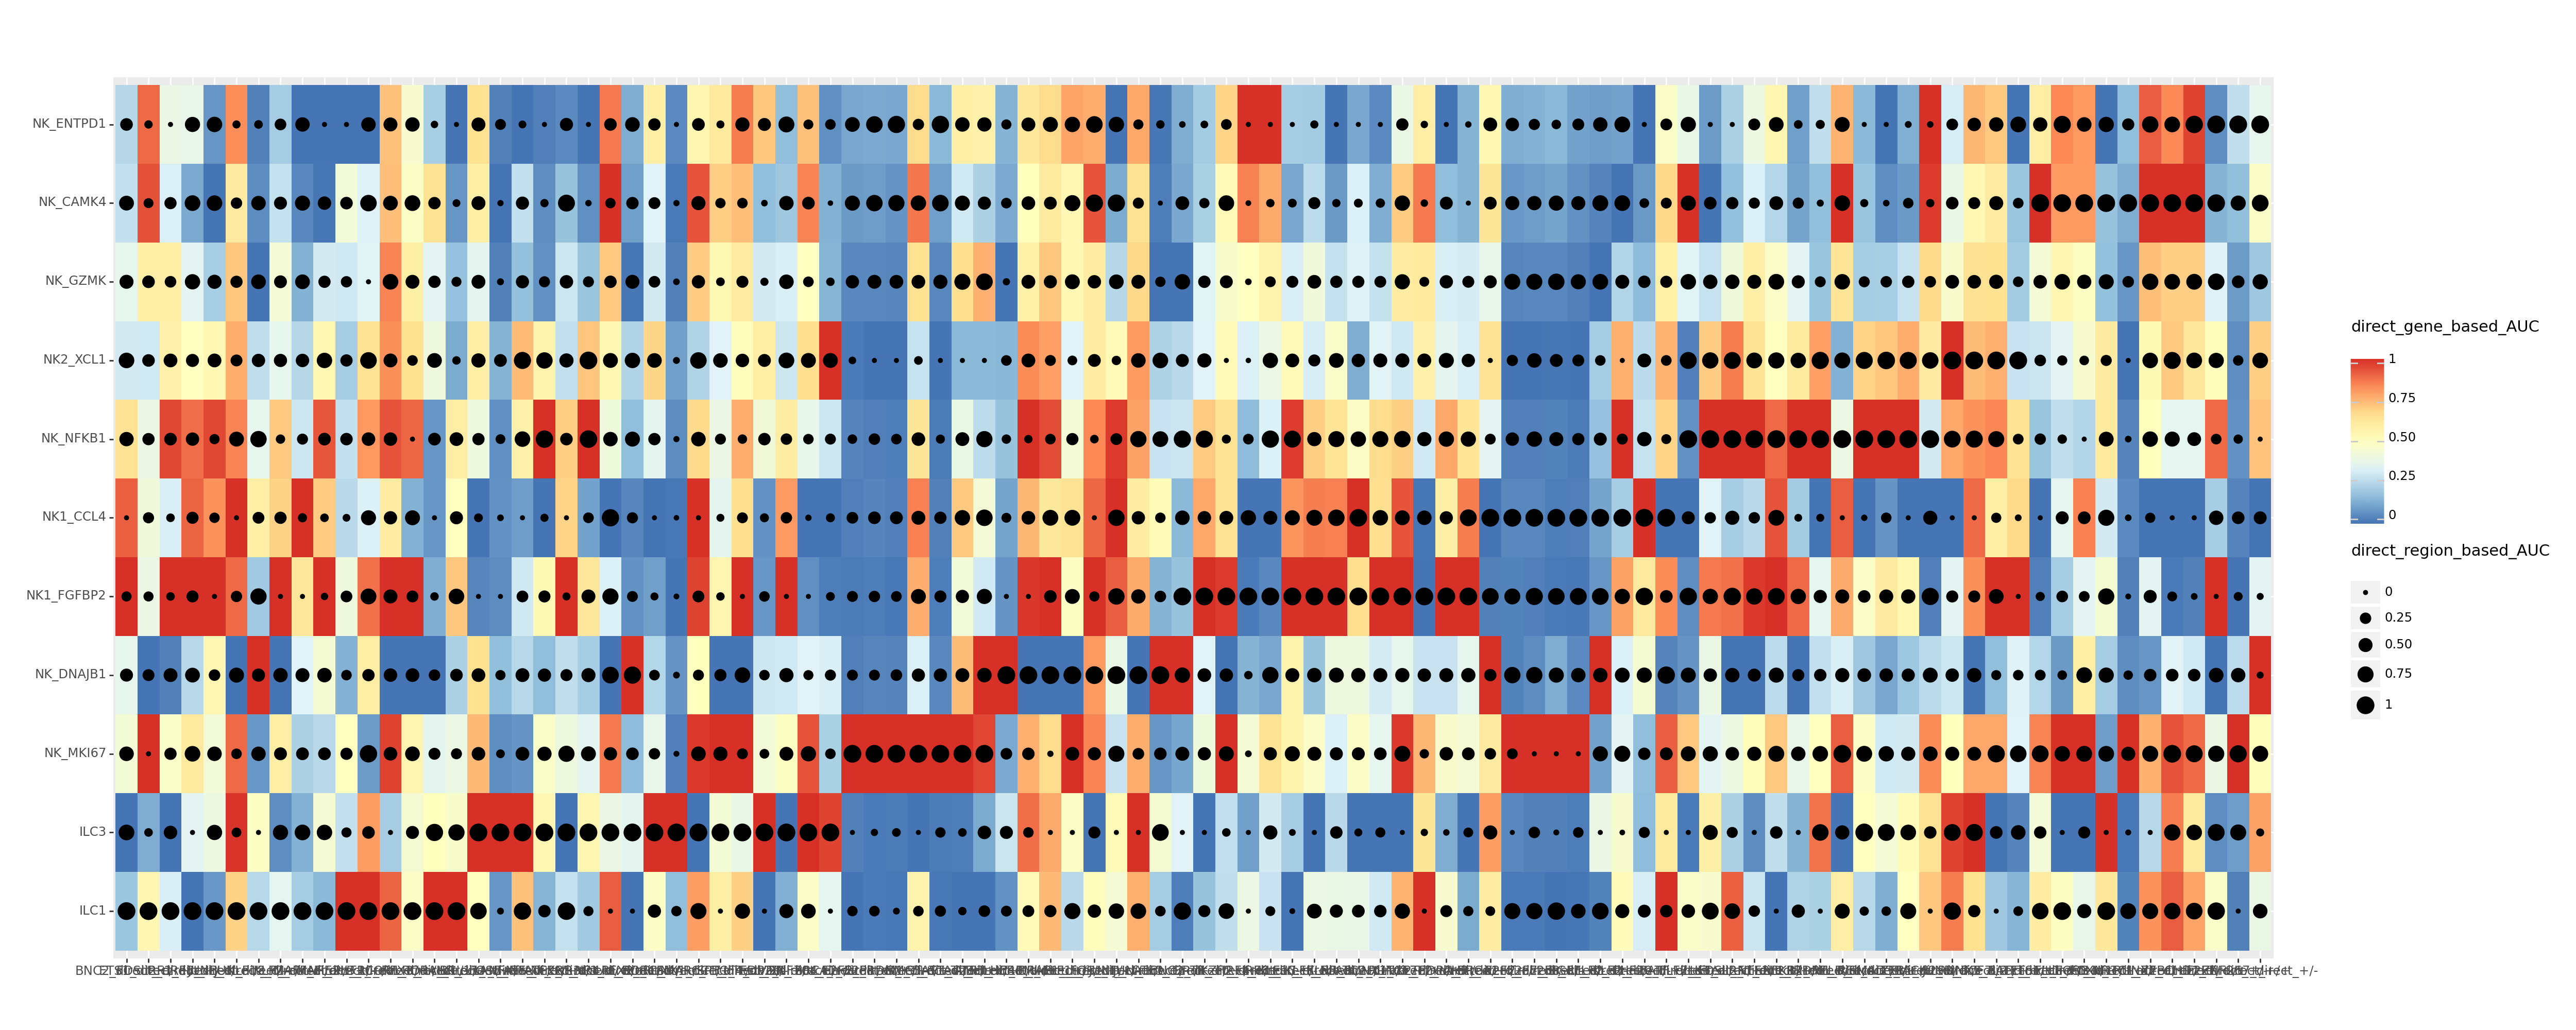

<Figure Size: (2500 x 1000)>

In [48]:
#Looking at the heatmaps Region selection

import matplotlib.pyplot as plt
heatmap_dotplot(
    scplus_mudata = scplus_mdata,
    color_modality = "direct_gene_based_AUC",
    size_modality = "direct_region_based_AUC",
    group_variable = "scRNA_counts:"+ CELL_TYPE_COLNAME,
    eRegulon_metadata_key = "direct_e_regulon_metadata",
    color_feature_key = "Gene_signature_name",
    size_feature_key = "Region_signature_name",
    feature_name_key = "eRegulon_name",
    sort_data_by = "direct_region_based_AUC",
    orientation = "horizontal",
    figsize = (25, 10),
    group_variable_order = GROUP_VARIABLE_ORDER,
    subset_feature_names = filtered_eRegulon_names
    #save = os.path.join( PATH_ANALYSIS_OUTPUT, "heatmap_dotplots/Heat_Map__DotPlot_Region_Best_horizontal.pdf")
)

In [54]:
# Saving the heatmaps vertical, horizontal, Gene and Region based
import matplotlib.pyplot as plt
heatmap_dotplot(
    scplus_mudata = scplus_mdata,
    color_modality = "direct_gene_based_AUC",
    size_modality = "direct_region_based_AUC",
    group_variable = "scRNA_counts:"+ CELL_TYPE_COLNAME,
    eRegulon_metadata_key = "direct_e_regulon_metadata",
    color_feature_key = "Gene_signature_name",
    size_feature_key = "Region_signature_name",
    feature_name_key = "eRegulon_name",
    sort_data_by = "direct_gene_based_AUC",
    orientation = "horizontal",
    figsize = (25, 10),
    group_variable_order = GROUP_VARIABLE_ORDER,
    subset_feature_names = filtered_eRegulon_names,
    save = os.path.join( PATH_ANALYSIS_OUTPUT, "heatmap_dotplots/Heat_Map__DotPlot_Gene_Best_horizontal.pdf")
)

import matplotlib.pyplot as plt
heatmap_dotplot(
    scplus_mudata = scplus_mdata,
    color_modality = "direct_gene_based_AUC",
    size_modality = "direct_region_based_AUC",
    group_variable = "scRNA_counts:"+ CELL_TYPE_COLNAME,
    eRegulon_metadata_key = "direct_e_regulon_metadata",
    color_feature_key = "Gene_signature_name",
    size_feature_key = "Region_signature_name",
    feature_name_key = "eRegulon_name",
    sort_data_by = "direct_gene_based_AUC",
    orientation = "vertical",
    figsize = (10, 25),
    group_variable_order = GROUP_VARIABLE_ORDER,
    subset_feature_names = filtered_eRegulon_names,
    save = os.path.join( PATH_ANALYSIS_OUTPUT, "heatmap_dotplots/Heat_Map__DotPlot_Gene_Best_vertical.pdf")
)

import matplotlib.pyplot as plt
heatmap_dotplot(
    scplus_mudata = scplus_mdata,
    color_modality = "direct_gene_based_AUC",
    size_modality = "direct_region_based_AUC",
    group_variable = "scRNA_counts:"+ CELL_TYPE_COLNAME,
    eRegulon_metadata_key = "direct_e_regulon_metadata",
    color_feature_key = "Gene_signature_name",
    size_feature_key = "Region_signature_name",
    feature_name_key = "eRegulon_name",
    sort_data_by = "direct_region_based_AUC",
    orientation = "horizontal",
    figsize = (25, 10),
    group_variable_order = GROUP_VARIABLE_ORDER,
    subset_feature_names = filtered_eRegulon_names,
    save = os.path.join( PATH_ANALYSIS_OUTPUT, "heatmap_dotplots/Heat_Map__DotPlot_Region_Best_horizontal.pdf")
)

import matplotlib.pyplot as plt
heatmap_dotplot(
    scplus_mudata = scplus_mdata,
    color_modality = "direct_gene_based_AUC",
    size_modality = "direct_region_based_AUC",
    group_variable = "scRNA_counts:"+ CELL_TYPE_COLNAME,
    eRegulon_metadata_key = "direct_e_regulon_metadata",
    color_feature_key = "Gene_signature_name",
    size_feature_key = "Region_signature_name",
    feature_name_key = "eRegulon_name",
    sort_data_by = "direct_region_based_AUC",
    orientation = "vertical",
    figsize = (10, 25),
    group_variable_order = GROUP_VARIABLE_ORDER,
    subset_feature_names = filtered_eRegulon_names,
    save = os.path.join( PATH_ANALYSIS_OUTPUT, "heatmap_dotplots/Heat_Map__DotPlot_Region_Best_vertical.pdf")
)

/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 25 x 10 in image.
/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /mnt/DOSI/EVLAB/BIOINFO/BIOINFO_PROJECT/Lung_Basel/01_ALL_SAMPLES/05_Output/04_SCENICplus_Analysis/04e_Step5_Downstream_Analysis/heatmap_dotplots/Heat_Map__DotPlot_Gene_Best_horizontal.pdf
/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 10 x 25 in image.
/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /mnt/DOSI/EVLAB/BIOINFO/BIOINFO_PROJECT/Lung_Basel/01_ALL_SAMPLES/05_Output/04_SCENICplus_Analysis/04e_Step5_Downstream_Analysis/heatmap_dotplots/Heat_Map__DotPlot_Gene_Best_vertical.pdf
/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 25 x 10 in image.
/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /mnt/DOSI/EVLAB/BIOINFO/BIOINFO_P

## Converting mudata output to old-style SCENIC+ object

In [62]:
from scenicplus.scenicplus_class import mudata_to_scenicplus

scplus_obj = mudata_to_scenicplus(
    mdata = scplus_mdata,
    path_to_cistarget_h5 = os.path.join(PATH_TO_THE_04d_OUPUT_FOLDER , "outs/ctx_results.hdf5"),
    path_to_dem_h5 = os.path.join(PATH_TO_THE_04d_OUPUT_FOLDER , "outs/dem_results.hdf5")
)


scplus_obj


SCENIC+ object with n_cells x n_genes = 28815 x 36601 and n_cells x n_regions = 28815 x 273300
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
	metadata_cell:'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'cell_type', 'sex', 'smoker', 'sample', 'nCount_peaks', 'nFeature_peaks', 'fragments', 'FRiP', 'blacklist_fraction', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'nucleosome_group', 'high.tss', 'percent.rb', 'percent.mt', 'percent.HSP', 'S.Score', 'G2M.Score', 'Phase', 'pct_chrY', 'nCount_SCT', 'nFeature_SCT', 'integrated.weight', 'peaks.weight', 'seurat_clusters', 'NK_sig_UCell', 'NK1_sig_UCell', 'NK2_sig_UCell', 'NKTvsNK_UCell', 'NKvsNKT_UCell', 'CD8_UCell', 'CD4_Treg_UCell', 'Monocytes_UCell', 'Bcell

In [45]:
# Save the old style SCENIC+ object using pickle
pickle.dump(
    scplus_obj,
    open(os.path.join(PATH_ANALYSIS_OUTPUT, "Old_Style_SCENICplus_Object.pkl"), "wb")
)

In [108]:
import os
import pandas as pd

# List of modalities
list_of_modalities = ["direct_gene_based_AUC", "extended_gene_based_AUC", "direct_region_based_AUC", "extended_region_based_AUC"]

# Directory to save the data (make sure the directory exists)
save_path = os.path.join(PATH_ANALYSIS_OUTPUT, "AUC_Tables")
os.makedirs(save_path, exist_ok=True)

# Loop through each modality in the list
for modality in list_of_modalities:
    # Access the slot
    modality_data = scplus_mdata.mod[modality]
    
    # Convert the .X matrix to a Pandas DataFrame (no need for toarray() if it's already a numpy array)
    modality_df = pd.DataFrame(
        modality_data.X, 
        index=modality_data.obs_names, 
        columns=modality_data.var_names
    )
    
    # Create the file name based on the modality
    file_name = f"{modality}.csv"
    
    # Save the DataFrame to a CSV file
    modality_df.to_csv(os.path.join(save_path, file_name))

    print(f"Saved {modality} to {file_name}")

Saved direct_gene_based_AUC to direct_gene_based_AUC.csv
Saved extended_gene_based_AUC to extended_gene_based_AUC.csv
Saved direct_region_based_AUC to direct_region_based_AUC.csv
Saved extended_region_based_AUC to extended_region_based_AUC.csv
